In [2]:
from FAdo.fa import *
from FAdo.reex import *
from FAdo.fio import *
from FAdo.rndadfa import *

import lark

In [ ]:
new_idea = NFA()
# ab+ba
sigma = set('ab')
num_states = 2*len(sigma)

new_idea.setSigma(['a','b'])

new_idea.addState("0")
new_idea.addState("1")
new_idea.addState("2")
new_idea.addState("3")

new_idea.addInitial(0)
new_idea.addFinal(3)

new_idea.addTransition(0, 'a', 0)
new_idea.addTransition(0, 'b', 0)
new_idea.addTransition(0, 'a', 1)
new_idea.addTransition(0, 'b', 2)
new_idea.addTransition(1, 'a', 0)
new_idea.addTransition(2, 'b', 0)
new_idea.addTransition(2, 'a', 1)
new_idea.addTransition(1, 'b', 2)
new_idea.addTransition(1, 'b', 3)
new_idea.addTransition(2, 'a', 3)
new_idea.addTransition(3, 'b', 2)
new_idea.addTransition(3, 'a', 1)


In [ ]:
graph = NFA() # abab + baba
word = "ababababababb"
graph.setSigma(set(word))
graph.addState("0")
graph.addState("1")
graph.addState("2")
graph.addState("3")
graph.addState("4")
graph.addState("5")
graph.addState("6")
graph.addState("7")

graph.addInitial(0)
graph.addFinal(7)

# abab
graph.addTransition(0, 'a', 1)
graph.addTransition(1, 'b', 2)
graph.addTransition(2, 'a', 3)
graph.addTransition(3, 'b', 7)

# baba
graph.addTransition(0, 'b', 4)
graph.addTransition(4, 'a', 5)
graph.addTransition(5, 'b', 6)
graph.addTransition(6, 'a', 7)

# inter
graph.addTransition(1, 'b', 4)
graph.addTransition(2, 'a', 5)
graph.addTransition(3, 'b', 6)

graph.addTransition(4, 'a', 1)
graph.addTransition(5, 'b', 2)
graph.addTransition(6, 'a', 3)

graph.addTransition(2, 'a', 1)
graph.addTransition(3, 'b', 2)
graph.addTransition(3, 'b', 4)

graph.addTransition(5, 'b', 4)
graph.addTransition(6, 'a', 5)
graph.addTransition(6, 'b', 1)

graph.addTransitionStar(7, 0)
graph.addTransitionStar(0, 0)

graph.display()


In [31]:
def cnt(grp, wrd):
	ilist = grp.epsilonClosure(set([0]))
	ctr = 0
	for i in wrd:
		ilist = grp.evalSymbol(ilist, i)
		for s in grp.Final:
			if s in ilist:
				ctr+=1
				break

	return ctr

In [ ]:
cnt(graph, 'ababab')

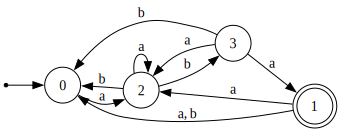

In [28]:
sigma = "ab"
kp = "aba"
ng = NFA()
ng.setSigma(sigma)
meta_transitions = []

# add first paths
splt = kp.split("|")
initial_state = ng.addState()
last_state = 0
final_state = ng.addState()
ng.addFinal(final_state)
for s in splt:
	ck=0
	for k in s:
		if ck == 0:
			last_state = ng.addState()
			ng.addTransition(initial_state, k, last_state)
			meta_transitions.append((initial_state, k, last_state, 1))
		elif ck == len(s)-1:
			ng.addTransition(last_state, k, final_state)
			meta_transitions.append((last_state, k, final_state, ck+1))
		else:
			old_state = last_state
			last_state = ng.addState()
			ng.addTransition(old_state, k, last_state)
			meta_transitions.append((old_state, k, last_state, ck+1))
		ck+=1

first_symbol_state = None
for t in ng.transitions():
	if t[0] == 0 and t[1] == kp[0]:
		first_symbol_state = t[2]
		break

if first_symbol_state is None:
	print("None!")
	exit()

for i in ng.States:
	if int(i) != 0:
		for s in sigma:
			if s != kp[0]:
				ng.addTransition(int(i), s, 0)
			else:
				ng.addTransition(int(i), kp[0], first_symbol_state)


	

ng.addInitial(0)

ng.addTransitionStar(final_state, 0)

ng.display()

In [33]:
cnt(ng, "ababa")

2